<a href="https://colab.research.google.com/github/zha70/zha70/blob/main/P_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


pre-processing

In [ ]:
x=df.drop("HeartDisease",axis="columns")
y=df["HeartDisease"]

In [ ]:
x.shape

(918, 11)

In [ ]:
y.shape

(918,)

In [ ]:
from sklearn.preprocessing import LabelEncoder

x=x.apply(LabelEncoder().fit_transform)

In [ ]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((734, 11), (184, 11))

In [ ]:
x_train.iloc[0]

Age                14
Sex                 1
ChestPainType       2
RestingBP          22
Cholesterol        98
FastingBS           1
RestingECG          1
MaxHR             116
ExerciseAngina      0
Oldpeak            18
ST_Slope            0
Name: 795, dtype: int64

In [ ]:
import numpy as np

x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
x_train[0]

array([ 14,   1,   2,  22,  98,   1,   1, 116,   0,  18,   0])

In [ ]:
x_test[0]

array([ 35,   0,   1,  41,  53,   0,   1, 105,   0,  10,   2])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

In [ ]:
x_test[0]

array([0.70833333, 0.        , 0.33333333, 0.62121212, 0.239819  ,
       0.        , 0.5       , 0.88983051, 0.        , 0.19230769,
       1.        ])

model definition

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=keras.Sequential()

model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dense(units=1,activation="sigmoid"))

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.binary_crossentropy,metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               1536      
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               16512     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               16512     
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 128)             

In [ ]:
hist=model.fit(x_train,y_train,epochs=200,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/200
6/6 [==============================] - 2s 40ms/step - loss: 0.6694 - accuracy: 0.5695 - val_loss: 0.6356 - val_accuracy: 0.7174
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6161 - accuracy: 0.6485 - val_loss: 0.5560 - val_accuracy: 0.8370
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5365 - accuracy: 0.7575 - val_loss: 0.4868 - val_accuracy: 0.7717
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4638 - accuracy: 0.8174 - val_loss: 0.4603 - val_accuracy: 0.7663
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4182 - accuracy: 0.8106 - val_loss: 0.4734 - val_accuracy: 0.7663
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4294 - accuracy: 0.8351 - val_loss: 0.4411 - val_accuracy: 0.8043
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4254 - accuracy: 0.8365 - val_loss: 0.4337 - val_accuracy: 0.8207
Epoch 8/200
6/6 [=====

Plot

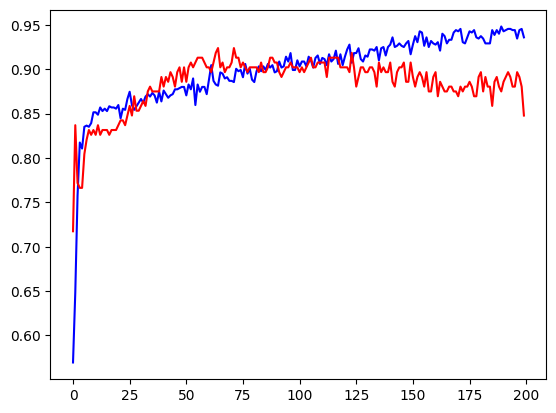

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"],color="blue")
plt.plot(hist.history["val_accuracy"],color="red")

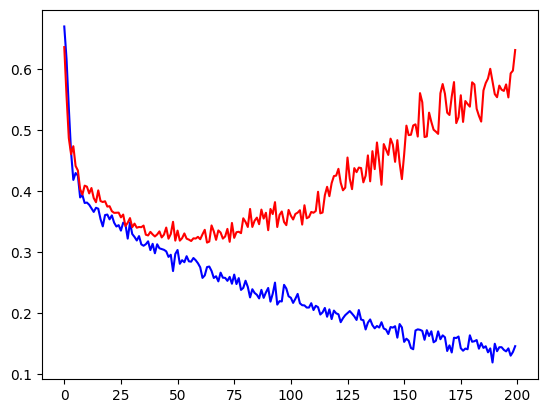

In [ ]:
plt.plot(hist.history["loss"],color="blue")
plt.plot(hist.history["val_loss"],color="red")